In [1]:
import ROOT

Welcome to JupyROOT 6.18/04


In [5]:
canvas = ROOT.TCanvas()

**Create TGraphErrors with data**

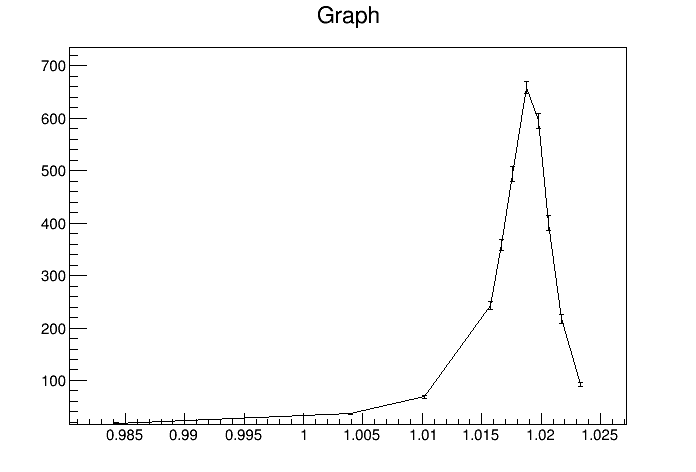

In [10]:
graph = ROOT.TGraphErrors("variant1.txt")
graph.Draw()
canvas.Draw()

Initial parameters (estimation from the graph)

In [12]:
A0 = 650
M0 = 1.017
G0 = 0.005

**Create function for fitting** 

In [3]:
def func(xx, pp):
    A = pp[0]
    M = pp[1]
    G = pp[2]
    E = xx[0]
    return (A*(G/2)**2) / ((E - M)**2 + (G/2)**2)

In [4]:
p_func = ROOT.TF1("p_function", func, 0.9, 1.1, 3)

In [13]:
p_func.SetParameter(0, A0)
p_func.SetParameter(1, M0)
p_func.SetParameter(2, G0)

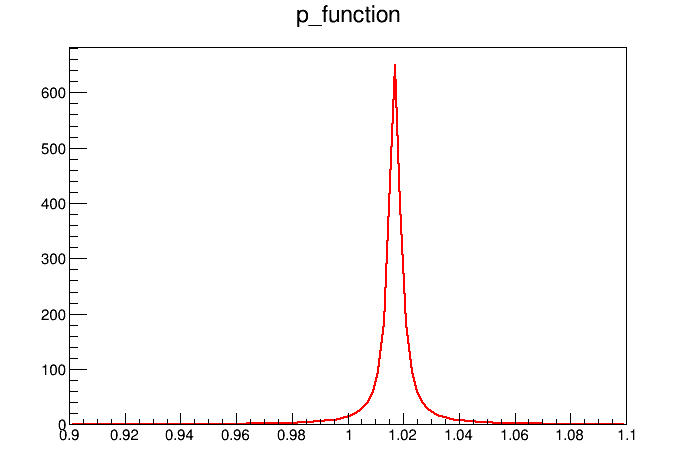

In [14]:
p_func.Draw()
canvas.Draw()

**Fit**

In [15]:
fit_result = graph.Fit(p_func, "S") #"S" for saving result in TFitResultPtr

 FCN=801.248 FROM MIGRAD    STATUS=CONVERGED      82 CALLS          83 TOTAL
                     EDM=8.9738e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.44647e+02   9.91980e+00   8.26113e-02   7.65238e-07
   2  p1           1.01858e+00   2.90706e-05   4.85697e-07  -1.44884e+00
   3  p2           4.69357e-03   8.08949e-05   6.60588e-07   6.69402e-02


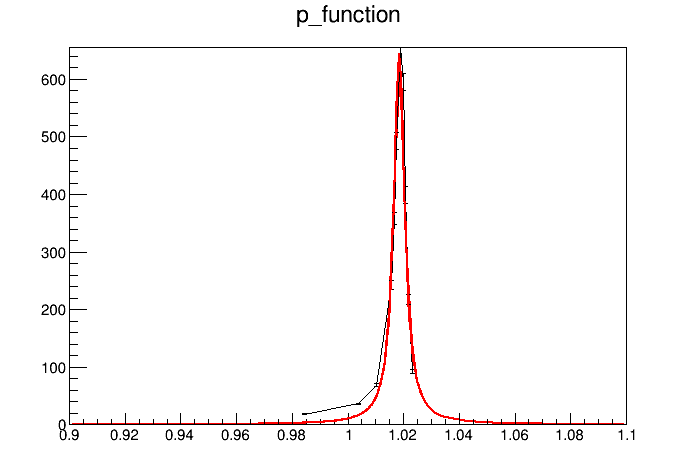

In [16]:
graph.Draw()
canvas.Draw()

**Get parameters**

*Double_t Prob(Double_t chi2, Int_t ndf)* 

Computation of the probability for a certain Chi-squared (chi2)
and number of degrees of freedom (ndf). Represents the probability that the observed Chi-squared for a correct model should be less than the value chi2. 

*(From doucumentation)*

In [24]:
A_fit = fit_result.Parameter(0)
A_err = fit_result.ParError(0)

In [30]:
print("'A' value fom fit:", fit_result.Parameter(0), 
      "\n'A' error from fit:", fit_result.ParError(0))

'A' value fom fit: 644.6474067713984 
'A' error from fit: 9.919800344173694


In [31]:
print("'M' value fom fit:", fit_result.Parameter(1), 
      "\n'M' error from fit:", fit_result.ParError(1))

'M' value fom fit: 1.0185810595915086 
'M' error from fit: 2.9070633956009275e-05


In [26]:
print(fit_result.Value(0), fit_result.Error(0))

644.6474067713984 9.919800344173694


In [32]:
print("'G' value fom fit:", fit_result.Parameter(2), 
      "\n'G' error from fit:", fit_result.ParError(2))

'G' value fom fit: 0.004693565712644669 
'G' error from fit: 8.089488153166807e-05


In [33]:
print("Chi2/ndf:", fit_result.Chi2()/fit_result.Ndf())

Chi2/ndf: 100.15596506306379


In [34]:
probability = ROOT.TMath.Prob(fit_result.Chi2(), fit_result.Ndf())
print("Probability:", probability)

Probability: 1.1081116791258045e-167


Correlation

In [37]:
corr_matrix = fit_result.GetCorrelationMatrix()
corr_matrix.Print()


3x3 matrix is as follows

     |      0    |      1    |      2    |
--------------------------------------------
   0 |          1      0.1987      -0.798 
   1 |     0.1987           1     -0.2774 
   2 |     -0.798     -0.2774           1 



**Energy scale contribution**

In [106]:
A_hist_en = ROOT.TH1F("A_energy", "A_energy", 200, 644.6, 644.7)
M_hist_en = ROOT.TH1F("M_energy", "M_energy", 200, 1.0175, 1.0195)
G_hist_en = ROOT.TH1F("G_energy", "G_energy", 200, 0.004693, 0.004694)

Warning in <TROOT::Append>: Replacing existing TH1: A_energy (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: M_energy (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: G_energy (Potential memory leak).


In [107]:
x_arr = graph.GetX()
y_arr = graph.GetY()
p_func.SetParameter(0, A0)
p_func.SetParameter(1, M0)
p_func.SetParameter(2, G0)

for j in range(1000):
    en_graph = ROOT.TGraphErrors()
    dE = ROOT.gRandom.Gaus(0, 0.0001) #0.1 MeV (units????) (eV)
    for i in range(graph.GetN()):
        en_graph.SetPoint(i, x_arr[i] + dE, y_arr[i])
        #print(en_graph.GetY()[i])
        en_graph.SetPointError(i, graph.GetErrorX(i), graph.GetErrorY(i))
    fit = en_graph.Fit(p_func, "SQ")
    #print(fit.Parameter(0))
    A_hist_en.Fill(fit.Parameter(0))
    M_hist_en.Fill(fit.Parameter(1))
    G_hist_en.Fill(fit.Parameter(2))

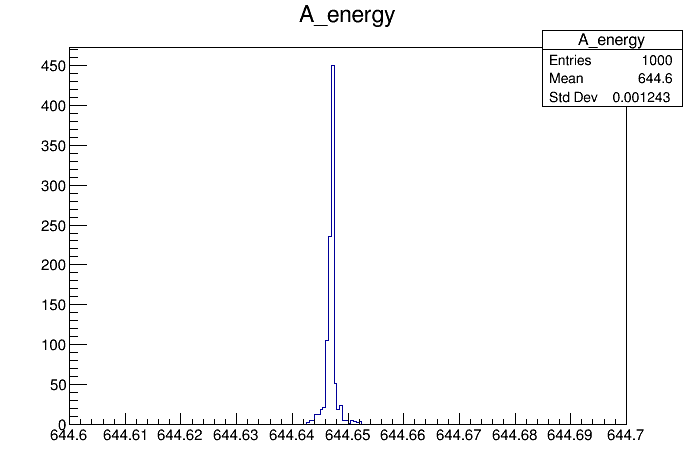

In [114]:
canvas.Clear()
A_hist_en.Draw()
canvas.Draw()

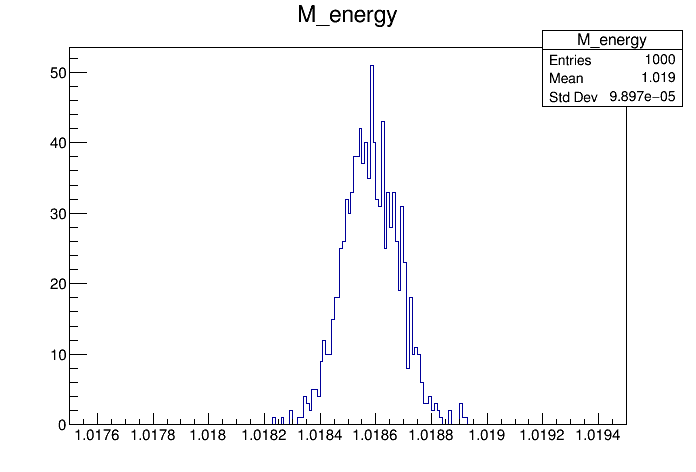

In [115]:
M_hist_en.Draw()
canvas.Draw()

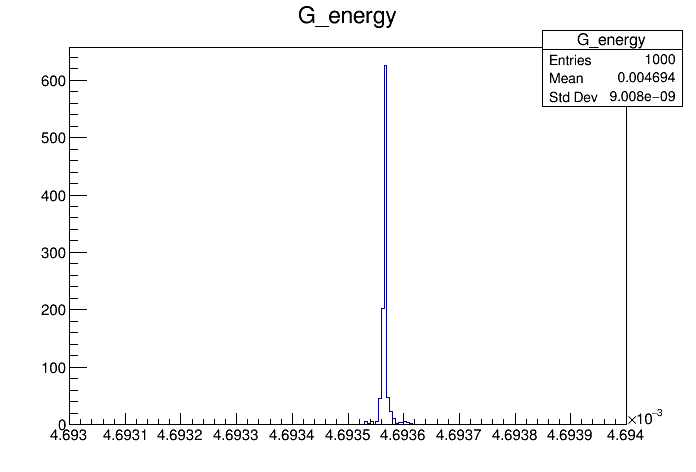

In [116]:
G_hist_en.Draw()
canvas.Draw()

Energy scale contribution: 

In [206]:
print("A:", A_hist_en.GetRMS(), '/', fit_result.ParError(0), '=', A_hist_en.GetRMS()/fit_result.ParError(0))
print("M:", M_hist_en.GetRMS(), '/', fit_result.ParError(1), '=', M_hist_en.GetRMS()/fit_result.ParError(1))
print("G:", G_hist_en.GetRMS(), '/', fit_result.ParError(2), '=', G_hist_en.GetRMS()/fit_result.ParError(2))

A: 0.0012431231594623464 / 9.919800344173694 = 0.00012531735683495723
M: 9.897294280523636e-05 / 2.9070633956009275e-05 = 3.4045677488494324
G: 9.008470048267907e-09 / 8.089488153166807e-05 = 0.00011136019829315585


**Efficiency**

In [191]:
A_hist_ef = ROOT.TH1F("A_effiency", "A_efficiency", 200, 620, 670)
M_hist_ef = ROOT.TH1F("M_effiency", "M_effiency", 200, 1.018, 1.019)
G_hist_ef = ROOT.TH1F("G_effiency", "G_effiency", 200, 0.0045, 0.0049)

Warning in <TROOT::Append>: Replacing existing TH1: A_effiency (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: M_effiency (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: G_effiency (Potential memory leak).


In [192]:
A_hist_ef.Reset()
M_hist_ef.Reset()
G_hist_ef.Reset()

In [193]:
p_func.SetParameter(0, A0)
p_func.SetParameter(1, M0)
p_func.SetParameter(2, G0)

for j in range(1000):
    ef_graph = ROOT.TGraphErrors()
    for i in range(graph.GetN()):
        err = y_arr[i]*0.01*x_arr[i]/1.02 # units???? (GeV)
        s = ROOT.gRandom.Gaus(y_arr[i], err)
        ef_graph.SetPoint(i, x_arr[i], s)
        ef_graph.SetPointError(i, graph.GetErrorX(i), graph.GetErrorY(i))
    fit = ef_graph.Fit(p_func, "SQ")
    #print(fit.Parameter(0))
    A_hist_ef.Fill(fit.Parameter(0))
    M_hist_ef.Fill(fit.Parameter(1))
    G_hist_ef.Fill(fit.Parameter(2))

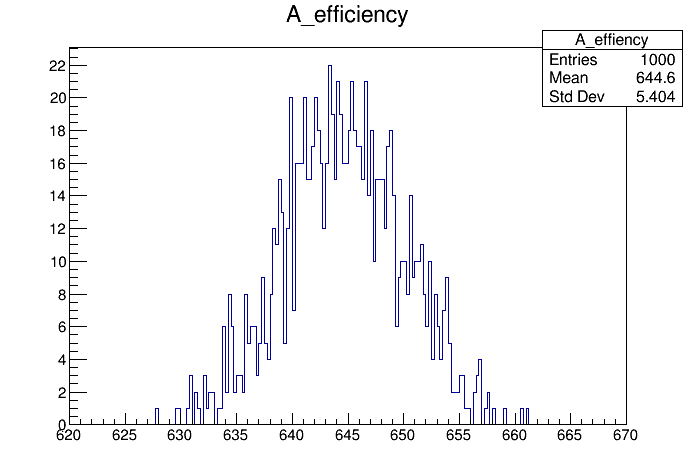

In [194]:
A_hist_ef.Draw()
canvas.Draw()

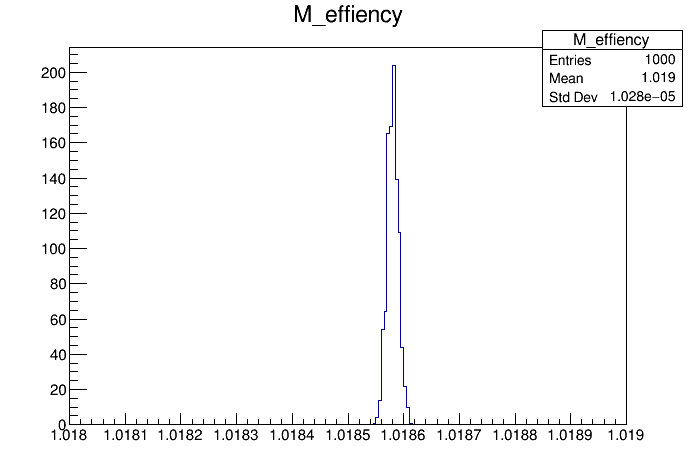

In [196]:
M_hist_ef.Draw()
canvas.Draw()

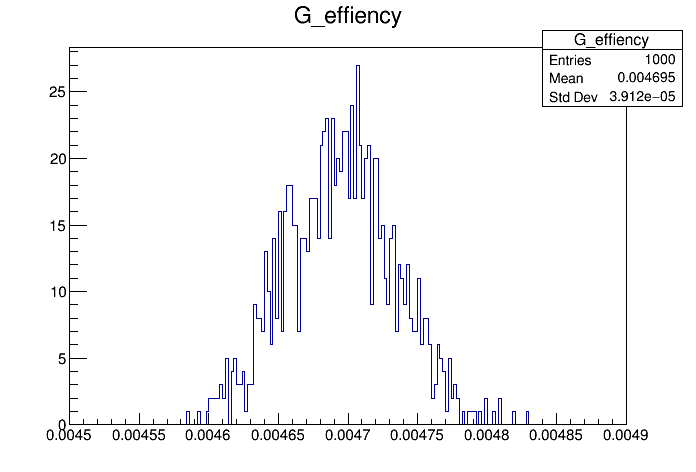

In [198]:
G_hist_ef.Draw()
canvas.Draw()

In [208]:
print("A:", A_hist_ef.GetRMS(), '/', fit_result.ParError(0), '=', A_hist_ef.GetRMS()/fit_result.ParError(0))
print("M:", M_hist_ef.GetRMS(), '/', fit_result.ParError(1), '=', M_hist_ef.GetRMS()/fit_result.ParError(1))
print("G:", G_hist_ef.GetRMS(), '/', fit_result.ParError(2), '=', G_hist_ef.GetRMS()/fit_result.ParError(2))

A: 5.40447493446979 / 9.919800344173694 = 0.5448169062842136
M: 1.0276865379110338e-05 / 2.9070633956009275e-05 = 0.35351363147641224
G: 3.91185558538763e-05 / 8.089488153166807e-05 = 0.4835726947515522


In [220]:
import math

In [209]:
AF = fit_result.Parameter(0)
MF = fit_result.Parameter(1)
GF = fit_result.Parameter(2)

In [218]:
dE = 0.001
ds = 0.01*(MF/1.02)*AF/2
ds

3.218753130647692

Если составить выражения для ошибок A(E, s), М, Г (через производные по E и s) и грубо оценить E как M, a s как A/2, то получится: 

In [ ]:
dA = ds
dA

In [222]:
dM2 = dE**2 + (4/(AF**2))*(ds**2) 
dM = math.sqrt(dM2)
dM

0.010036033574646613

In [225]:
math.sqrt((4/(AF**2))*(ds**2)) 

0.009986088819524593

In [226]:
dE

0.001

In [223]:
dG = 2*dE
dG

0.002

In [224]:
math.sqrt((4/(AF**2))*(ds**2)) 

0.009986088819524593